# P1 Test a Perceptual Phenomenon

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

The dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

In [29]:
stroopdata <- read.csv("stroopdata.csv", header = TRUE, sep = ",", dec = ".")
stroopdata

,Congruent,Incongruent
1,12.079,19.278
2,16.791,18.741
3,9.564,21.214
4,8.63,15.687
5,14.669,22.803
6,12.238,20.878
7,14.692,24.572
8,8.987,17.394
9,9.401,20.762
10,14.48,26.282


## Questions For Investigation

#### 1. What is our independent variable? What is our dependent variable?

The independent variable is "Condition" in the Stroop task: congruent words condition, and incongruent words condition. The dependent variable is time that the participant in the task takes to name the ink colours.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We can perform a t-test given that the size of our sample is less than 30 and The population standard deviation is unknown (estimated from your sample data). Moreover, we perform a dependent t-test given that in our case for same subject has been recorded a time in the each condition: a congruent words condition, and an incongruent words condition. A dependent t-test compares the means of two related groups to detect whether there are any statistically significant differences between these means. In particular, the first related group consists of the subjects who performing congruent task and the second related group consists of the same subjects, but their performance is relative to incongruent task. 

The null hypothesis(H0) that there are no significate differences between population average response time in the case congruent words (µC) and in the case incongruent words (µI).The altenative hypothesis(Ha) that there are significate differences between population average response time in the case congruent words (µC) and in the case incongruent words (µI). We can express this as follows: 
                                                       - H0: µC = µI

                                                       - HA: µC ≠ µI
                                                 
There is an important "assumptions" that underpin the dependent t-test. The distribution of the differences between response time in the case congruent words (µC) and in the case incongruent words (µI) needs to be approximately normally distributed. We subtract each individuals' response time score in one group from their score in the other related group and then testing for normality.

In [38]:
stroopdatadiff <- read.csv("stroopdatadiff.csv", header = TRUE, sep = ";", dec = ".")
stroopdatadiff

,Congruent,Incongruent,diff
1,12.079,19.278,7.199
2,16.791,18.741,1.95
3,9.564,21.214,11.65
4,8.63,15.687,7.057
5,14.669,22.803,8.134
6,12.238,20.878,8.64
7,14.692,24.572,9.88
8,8.987,17.394,8.407
9,9.401,20.762,11.361
10,14.48,26.282,11.802


In order to determine normality graphically, we can use the output of a normal Q-Q Plot. As we can see from the normal Q-Q plot below, the data is approximately normally distributed. In fact, the data points will be close to the diagonal line. 

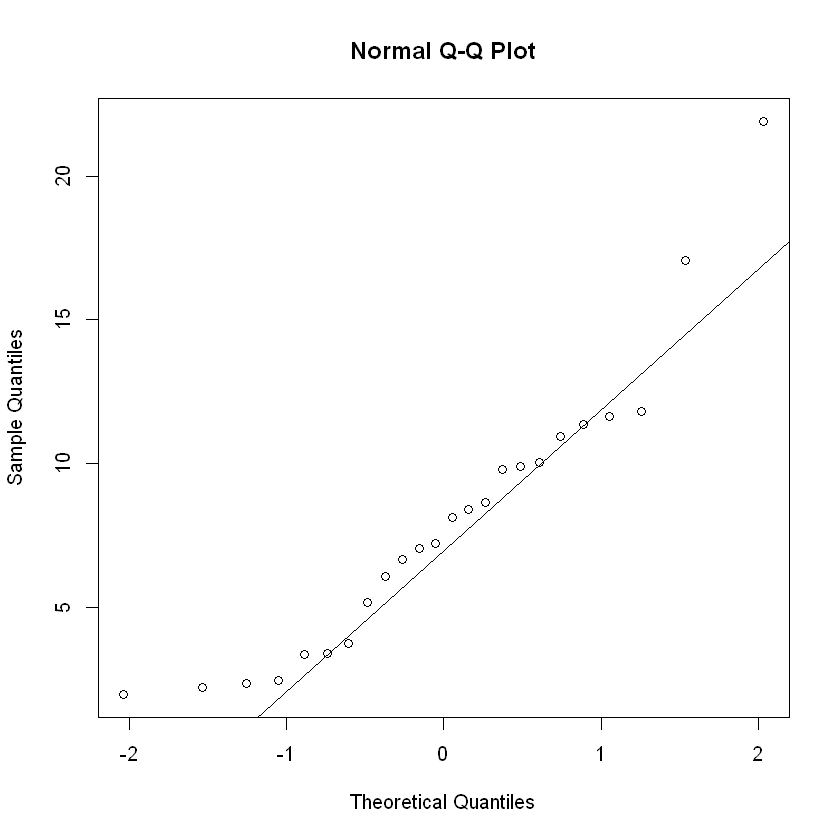

In [31]:
qqnorm(stroopdatadiff$diff)
qqline(stroopdatadiff$diff)


#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Measure of central tendency 

In [32]:
mean(stroopdata$Congruent)
mean(stroopdata$Incongruent)
median(stroopdata$Congruent)
median(stroopdata$Incongruent)

[1] 14.05113

[1] 22.01592

[1] 14.3565

[1] 21.0175

Measure of variability

In [33]:
sd(stroopdata$Congruent)
sd(stroopdata$Incongruent)
IQR(stroopdata$Congruent)
IQR(stroopdata$Incongruent)

[1] 3.559358

[1] 4.797057

[1] 4.3055

[1] 5.33475

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

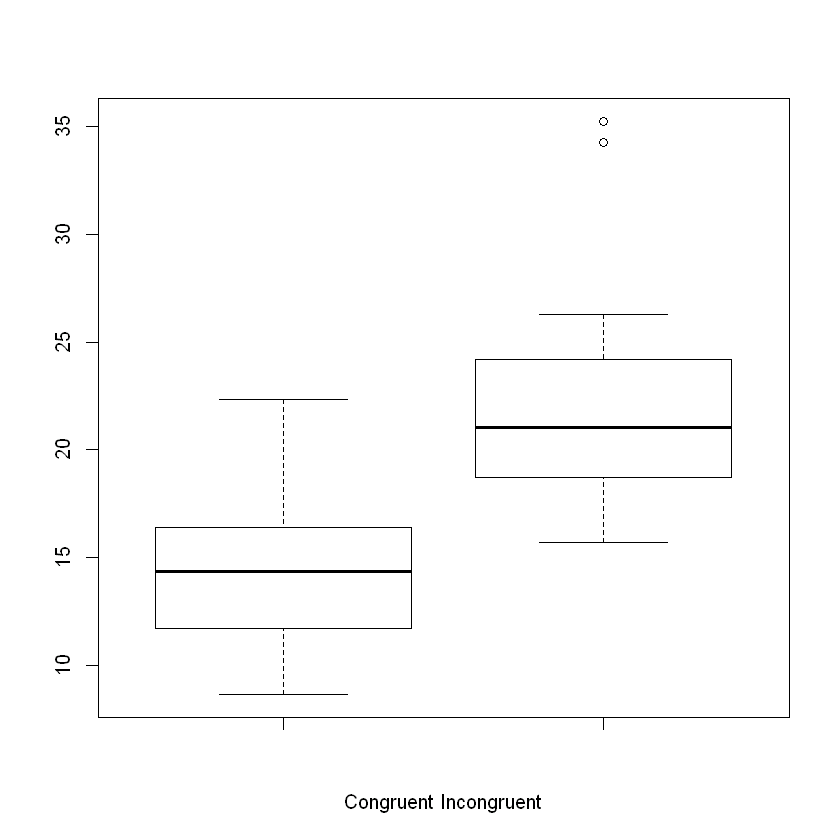

In [42]:
boxplot(stroopdata$Congruent,stroopdata$Incongruent,xlab="Congruent Incongruent")

From box plot, figure above, we can observe:
- The data of “congruent words condition” are less spread out since the area of boxplot is smaller than incongruent words condition one. 
- The median divides the box into two unequal pieces. In the “congruent words condition”, the longer part of the box is below the median, the data are skewed right; in the “incongruent words condition”, the longer part is above the median, the data are skewed left. 
- There are observations that lies an abnormal distance from other values, so-called outliers, in the “incongruent words condition”.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [25]:
t.test(stroopdata$Incongruent,stroopdata$Congruent,paired=TRUE, alt="two.sided")


	Paired t-test

data:  stroopdata$Incongruent and stroopdata$Congruent
t = 8.0207, df = 23, p-value = 4.103e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.910555 10.019028
sample estimates:
mean of the differences 
               7.964792 


The confidence level chosen is 0.95 and the critical statistic value is ±2.069. We reject the null hypothesis that there are no significant differences between the means and accept the alternative hypothesis that there are statistically significant differences between the means. In fact, t-statistic is greater than critical value. The result confirm my expectations: the Stroop effect is, in psychology, a demonstration of interference in the reaction time of a task. 

## References

- https://en.wikipedia.org/wiki/Stroop_effect
- https://statistics.laerd.com/features-tests.php
- http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/